In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns

% matplotlib inline
%load_ext autoreload
% autoreload 2

In [2]:
pre_IE50_reci = pd.read_pickle('/data/ana_post_IE50Hz_reci')
pre_IE50_uni = pd.read_pickle('/data/ana_post_IE50Hz_uni')
pre_IE50 = pd.read_pickle('/data/ana_post_IE50Hz')

In [3]:
pre_IE50_reci

,Before,After,File name,elimi
25,"{'rs': [[9.02640397835], [8.76712012442], [8.5...","{'rs': [[7.20642199664], [7.19112389162], [7.1...",2017032202,20
26,"{'rs': [[9.95058101283], [9.76072764448], [9.6...","{'rs': [[11.9252212025], [16.2093571135], [10....",2017032403,25
27,"{'rs': [[10.5663134789], [10.5119989745], [10....","{'rs': [[11.1585920206], [11.4148170524], [11....",2017032902,25
28,"{'rs': [[nan], [nan], [nan], [9.29331587509], ...","{'rs': [[9.35859652493], [9.46787951188], [9.4...",2017042701,10
29,"{'rs': [[8.54513659771], [8.4050431087], [8.35...","{'rs': [[8.95261158559], [8.97534077975], [9.0...",2017032203,15


In [4]:
pre_IE50_uni

,Before,After,File name,elimi
21,"{'rs': [[7.18475307623], [7.17279118289], [7.2...","{'rs': [[6.95086141981], [6.91487127097], [6.8...",2017032901,20
22,"{'rs': [[10.0068216917], [10.4775174982], [10....","{'rs': [[10.5971954741], [10.4820175917], [10....",2017042401,15
23,"{'rs': [[nan], [11.6428388831], [11.2472687155...","{'rs': [[11.4797907157], [11.452967448], [11.3...",2017042402,20
24,"{'rs': [[12.4609466874], [13.4809876462], [14....","{'rs': [[14.5593916022], [15.3314123046], [15....",2017062203,35


In [5]:
pre_IE50

,Before,After,File name,elimi
21,"{'rs': [[7.18475307623], [7.17279118289], [7.2...","{'rs': [[6.95086141981], [6.91487127097], [6.8...",2017032901,20
22,"{'rs': [[10.0068216917], [10.4775174982], [10....","{'rs': [[10.5971954741], [10.4820175917], [10....",2017042401,20
23,"{'rs': [[nan], [11.6428388831], [11.2472687155...","{'rs': [[11.4797907157], [11.452967448], [11.3...",2017042402,20
24,"{'rs': [[12.4609466874], [13.4809876462], [14....","{'rs': [[14.5593916022], [15.3314123046], [15....",2017062203,35
25,"{'rs': [[9.02640397835], [8.76712012442], [8.5...","{'rs': [[7.20642199664], [7.19112389162], [7.1...",2017032202,20
26,"{'rs': [[9.95058101283], [9.76072764448], [9.6...","{'rs': [[11.9252212025], [16.2093571135], [10....",2017032403,25
27,"{'rs': [[10.5663134789], [10.5119989745], [10....","{'rs': [[11.1585920206], [11.4148170524], [11....",2017032902,25
28,"{'rs': [[nan], [nan], [nan], [9.29331587509], ...","{'rs': [[9.35859652493], [9.46787951188], [9.4...",2017042701,10
29,"{'rs': [[8.54513659771], [8.4050431087], [8.35...","{'rs': [[8.95261158559], [8.97534077975], [9.0...",2017032203,15


/src/Patch_ana/Patch_ana/patch_pip.py:471: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


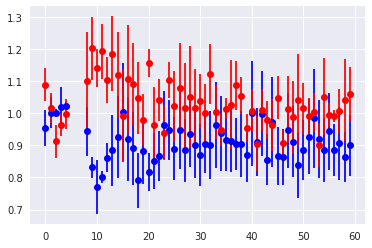

In [6]:
ave_ptl_resp = np.ones((len(pre_IE50_reci), 60))*np.nan

ave_ptl_mean_50reci,ave_ptl_ste_50reci = patch_pip.samp_ave(pre_IE50_reci, ave_ptl_resp)
plt.errorbar(x=np.arange(len(ave_ptl_mean_50reci)), y=ave_ptl_mean_50reci, yerr=ave_ptl_ste_50reci, fmt='bo')

ave_ptl_resp = np.ones((len(pre_IE50_uni), 60))*np.nan
ave_ptl_mean_50uni,ave_ptl_ste_50uni = patch_pip.samp_ave(pre_IE50_uni, ave_ptl_resp)
plt.errorbar(x=np.arange(len(ave_ptl_mean_50uni)), y=ave_ptl_mean_50uni, yerr=ave_ptl_ste_50uni, fmt='ro')

/src/Patch_ana/Patch_ana/patch_pip.py:471: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


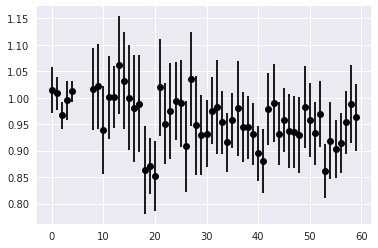

In [12]:
ave_ptl_resp = np.ones((len(pre_IE50), 60))*np.nan
ave_ptl_mean_50,ave_ptl_ste_50 = patch_pip.samp_ave(pre_IE50, ave_ptl_resp)
plt.errorbar(x=np.arange(len(ave_ptl_mean_50)), y=ave_ptl_mean_50, yerr=ave_ptl_ste_50, fmt='ko')

[0, 60, 0.2, 1.6]

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


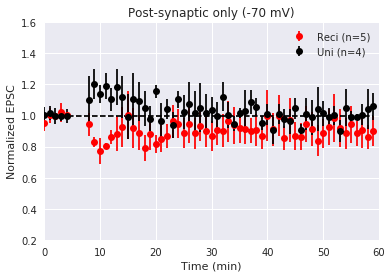

In [17]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_50reci,ave_ptl_ste_50reci 
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='ro', label='Reci (n={a})'.format(a=len(pre_IE50_reci)))

ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50uni,ave_ptl_ste_50uni
ave_ptl_mean, ave_ptl_ste= patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_50cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ko', label='Uni (n={a})'.format(a=len(pre_IE50_uni)))

plt.plot(np.ones((60))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('Post-synaptic only (-70 mV)')
plt.axis([0,60,0.2,1.6])

[0, 60, 0.2, 1.6]

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


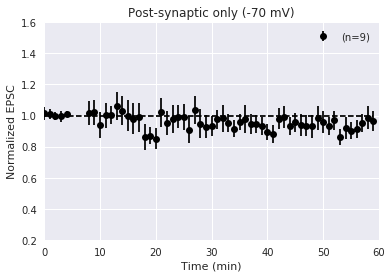

In [16]:
ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50,ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste= patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_50cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ko', label='(n={a})'.format(a=len(pre_IE50)))

plt.plot(np.ones((60))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('Post-synaptic only (-70 mV)')
plt.axis([0,60,0.2,1.6])

<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


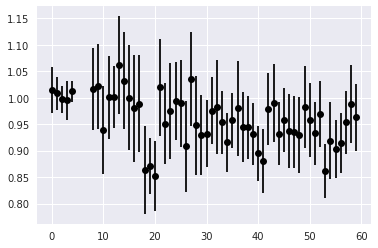

In [15]:
plt.errorbar(x=np.arange(len(ave_ptl_mean_50)), y=ave_ptl_mean_50, yerr=ave_ptl_ste_50, fmt='ko')